<a href="https://colab.research.google.com/github/ShriCharan05/Deep-learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement


Goal: Build a model that reads a handwritten number (0-9) and correctly predicts which number it is.

Dataset: MNIST — 70,000 images (60,000 training + 10,000 testing).

Each image is:

28×28 pixels

Grayscale (one color channel)

A single handwritten digit

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print("training data shape:",x_train.shape)
print("test data shape:",x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
training data shape: (60000, 28, 28)
test data shape: (10000, 28, 28)


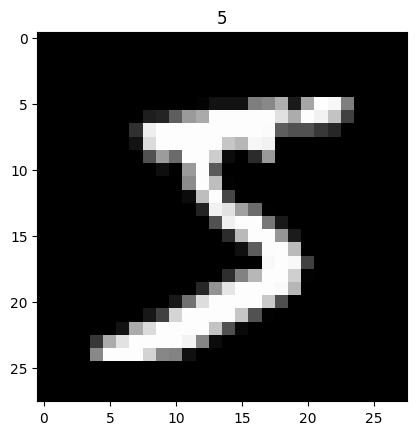

In [3]:
#visualise the image

plt.imshow(x_train[0],cmap='gray')
plt.title(y_train[0])
plt.show()

In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
#Building neural network

model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8791 - loss: 0.4344
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9656 - loss: 0.1195
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9763 - loss: 0.0777
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9833 - loss: 0.0561
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9877 - loss: 0.0420
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0326
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9919 - loss: 0.0257
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9937 - loss: 0.0213
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9948 - loss: 0.0174
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0140


In [9]:
# Evaluating the model

test_loss,test_accuracy=model.evaluate(x_test,y_test)
print("Test Accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0995
Test Accuracy: 0.9793000221252441


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


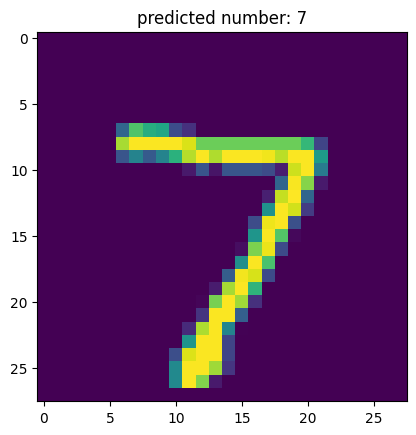

In [14]:
predictions=model.predict(x_test)

import numpy as np

plt.imshow(x_test[0])
plt.title(f"predicted number: {np.argmax(predictions[0])}")
plt.show()